In [1]:
# Sales analysis: dealer/channel performance
from pathlib import Path
import pandas as pd, matplotlib.pyplot as plt

root = Path.cwd()
if not (root / "data").exists() and (root.parent / "data").exists():
    root = root.parent

sales = pd.read_csv(root / "data" / "sales" / "sales_q1_2025.csv")

# Basic KPIs
sales['date'] = pd.to_datetime(sales['date'])
kpis = {
    "total_units": int(sales['units_sold'].sum()),
    "total_revenue_usd": float(sales['net_sales_usd'].sum()),
    "days": sales['date'].nunique()
}
kpis

{'total_units': 9361, 'total_revenue_usd': 455780.8, 'days': 90}

'Saved: sales_top_dealers.png, sales_by_channel.png'

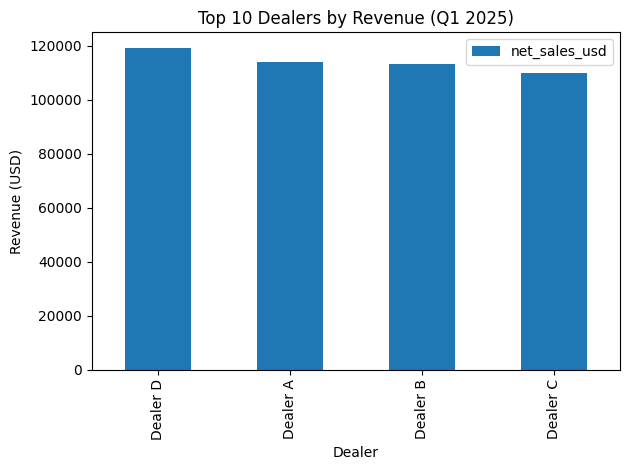

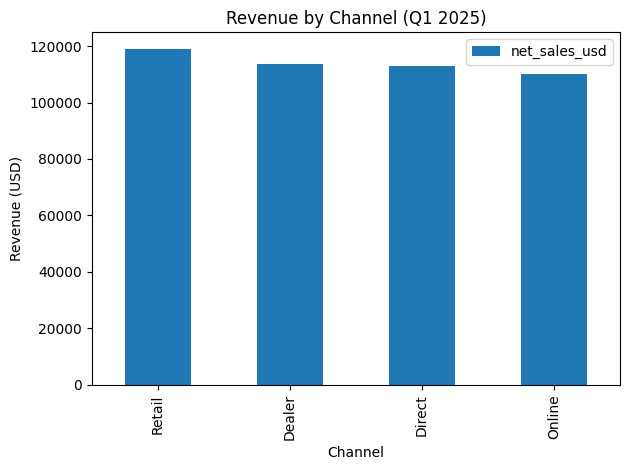

In [2]:
# Top dealers by revenue & channel mix
dealer_rev = (sales.groupby(['dealer_name'])['net_sales_usd']
              .sum().sort_values(ascending=False).head(10)).reset_index()

channel_rev = (sales.groupby(['channel'])['net_sales_usd']
               .sum().sort_values(ascending=False)).reset_index()

# Save charts
Path(root / "visuals").mkdir(exist_ok=True)

fig, ax = plt.subplots()
dealer_rev.plot(x='dealer_name', y='net_sales_usd', kind='bar', ax=ax,
                title='Top 10 Dealers by Revenue (Q1 2025)')
ax.set_xlabel('Dealer'); ax.set_ylabel('Revenue (USD)')
fig.tight_layout()
fig.savefig(root / "visuals" / "sales_top_dealers.png", dpi=150, bbox_inches='tight')

fig, ax = plt.subplots()
channel_rev.plot(x='channel', y='net_sales_usd', kind='bar', ax=ax,
                 title='Revenue by Channel (Q1 2025)')
ax.set_xlabel('Channel'); ax.set_ylabel('Revenue (USD)')
fig.tight_layout()
fig.savefig(root / "visuals" / "sales_by_channel.png", dpi=150, bbox_inches='tight')

"Saved: sales_top_dealers.png, sales_by_channel.png"